# **Setup**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


# **Data Import**

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

print(df.shape)
print(df.columns)
df.head()

(14999, 10)
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# **Data Validation**

In [7]:
df.isna().any()  

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
df.isna().sum()    

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.describe(include='object')

,sales,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


# **Data Pre Processing**

## **Salary Column**

In [9]:
df['salary'].head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [10]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [11]:
df['salary'] = df['salary'].map({'low': 1,'medium': 2, 'high': 3})

df['salary'].value_counts()

salary
1    7316
2    6446
3    1237
Name: count, dtype: int64

## **Sales Column**

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [13]:
df['sales'].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [15]:
df['sales'].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

# **Data Exploration**

## **Correlation**

<Axes: >

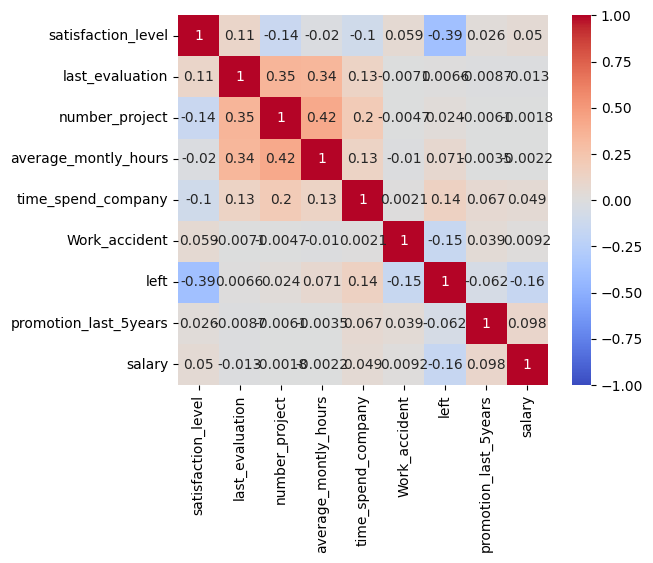

In [20]:
sns.heatmap(df.corr(numeric_only=True),square=True,annot=True,cmap='coolwarm',vmin=-1,vmax=1)

## **Analyze By Binary Variable**

In [41]:
df.select_dtypes(include='number').groupby(['left'],as_index=False).agg(['count','sum','min','max','mean','std'])

left satisfaction_level                                           \
                    count      sum   min   max      mean       std   
0    0              11428  7620.30  0.12  1.00  0.666810  0.217104   
1    1               3571  1571.59  0.09  0.92  0.440098  0.263933   

  last_evaluation                 ... promotion_last_5years                \
            count      sum   min  ...                   min max      mean   
0           11428  8176.43  0.36  ...                     0   1  0.026251   
1            3571  2564.38  0.45  ...                     0   1  0.005321   

            salary                                     
        std  count    sum min max      mean       std  
0  0.159889  11428  18867   1   3  1.650945  0.655277  
1  0.072759   3571   5052   1   3  1.414730  0.537341  

[2 rows x 49 columns]

In [50]:
for col in df.select_dtypes(include='number').columns:
    print(f'{col} Vs Employee Retention')
    display(df.loc[:,[col,'left']].groupby('left',as_index=False).agg(['count','mean','min','max','std']))

satisfaction_level Vs Employee Retention


left satisfaction_level                                
                    count      mean   min   max       std
0    0              11428  0.666810  0.12  1.00  0.217104
1    1               3571  0.440098  0.09  0.92  0.263933

last_evaluation Vs Employee Retention


left last_evaluation                               
                 count      mean   min  max       std
0    0           11428  0.715473  0.36  1.0  0.162005
1    1            3571  0.718113  0.45  1.0  0.197673

number_project Vs Employee Retention


left number_project                            
                count      mean min max       std
0    0          11428  3.786664   2   6  0.979884
1    1           3571  3.855503   2   7  1.818165

average_montly_hours Vs Employee Retention


left average_montly_hours                                 
                      count        mean  min  max        std
0    0                11428  199.060203   96  287  45.682731
1    1                 3571  207.419210  126  310  61.202825

time_spend_company Vs Employee Retention


left time_spend_company                            
                    count      mean min max       std
0    0              11428  3.380032   2  10  1.562348
1    1               3571  3.876505   2   6  0.977698

Work_accident Vs Employee Retention


left Work_accident                            
               count      mean min max       std
0    0         11428  0.175009   0   1  0.379991
1    1          3571  0.047326   0   1  0.212364

left Vs Employee Retention


ValueError: Grouper for 'left' not 1-dimensional

In [ ]:
df.columns